In [138]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import subprocess
import itertools
from timeit import timeit
from Bio import Phylo
from io import StringIO
from math import log
from scipy.stats import pearsonr
from copy import deepcopy

In [160]:
Position = []
seqs_at_pos = []
num_of_SNPs = []
folder = "Daria_Seq_Report/recophy_downloads/"

with open(folder+'snp_types.txt', 'r') as file:
    lines = file.readlines()

    for line in lines:
        parts = line.strip().split('\t')
        Position.append(parts[0])
        res = [int(ele) for ele in parts[1]]
        seqs_at_pos.append(np.array(res).squeeze())
        num_of_SNPs.append(np.sum(seqs_at_pos))


In [147]:
def findOccurrences(s, ch):
    return [i for i, letter in enumerate(s) if letter == ch]

def check_clash_symm(seq1, seq2):
    return check_clash(seq1, seq2) or check_clash(seq2, seq1)

def check_clash(prev_seqs, next_seqs):
    ones = deepcopy(prev_seqs)
    zeros = deepcopy(np.ones_like(prev_seqs) - prev_seqs)
    
    ones -= next_seqs
    zeros -= next_seqs
    
    if (np.min(ones) < 0) and (np.min(zeros) < 0):
        return True
    else:
        return False

def numberOfClashes(prev_seqs, next_seqs) -> int:
    ones = deepcopy(prev_seqs)
    zeros = deepcopy(np.ones_like(prev_seqs) - prev_seqs)
    
    ones -= next_seqs
    zeros -= next_seqs
    count_negative_ones = np.sum(ones == -1)
    count_negative_zeros = np.sum(zeros == -1)
    return max(count_negative_ones, count_negative_zeros)

def compute_clashes(seqs_at_pos):
    length_no_clash = int(0)
    position_of_clashes = []
    num_of_clashes = []
    num_of_SNPs_clashes = []

    lengths_clashes = []
    lengths_position_clashes = []

    for i, seqs_current in enumerate(seqs_at_pos):
        for seqs_no_clash in seqs_at_pos[i-length_no_clash:i]:
            if check_clash_symm(seqs_no_clash, seqs_current):
                # print(i-length_no_clash, i)
                init_Pos = int(Position[i-length_no_clash])
                fin_Pos = int(Position[i])

                lengths_position_clashes.append(fin_Pos-init_Pos)
                position_of_clashes.append(fin_Pos)
                lengths_clashes.append(length_no_clash)
                position_of_clashes.append(fin_Pos)
                num_of_clashes.append(numberOfClashes(seqs_no_clash, seqs_current))
                num_of_SNPs_clashes.append(np.sum(seqs_at_pos[i-length_no_clash:i]))
                
                length_no_clash = 0
            # print(seqs_current)
        length_no_clash +=1
    return num_of_clashes, num_of_SNPs_clashes, lengths_position_clashes

In [149]:
block_size = 5*1000
position_begin = float(Position[0])
position_end = float(Position[-1])
itr = np.arange(0, position_end, block_size)
position_clashes_iter = iter(position_of_clashes)
current_position_clashes = next(position_iter)

position_SNPs_iter = iter(position_of_clashes)
current_position_SNPs = next(position_iter)

for i in itr:
    if i < current_position_genome:
        num_Clashes_per_block = 0
        num_SNP_per_block = 

    if i > current_position_genome:
        SNP_per 

In [143]:
np.sum(seqs_at_pos[5:10])

69

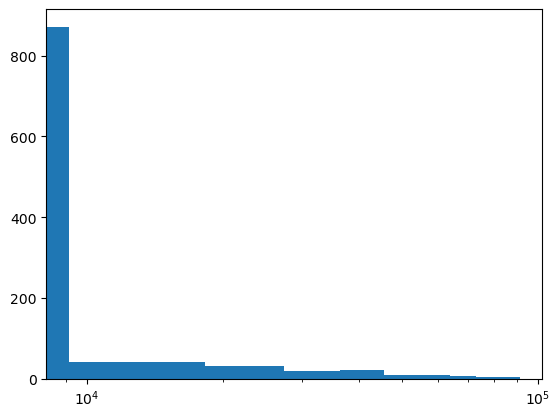

In [142]:
plt.hist(lengths_position_clashes)
plt.xscale("log")
# plt.xlim(0, 1.5e6)

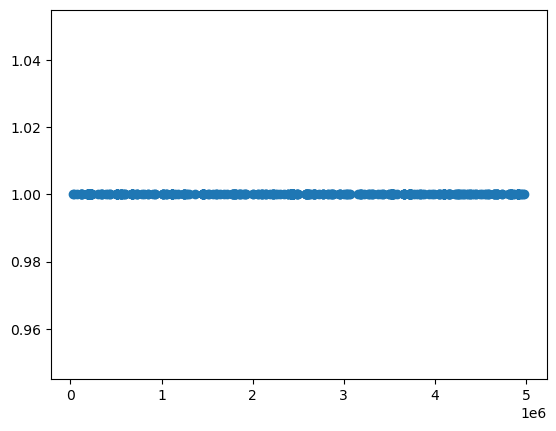

In [119]:
def c_over_m(seqs_at_pos):
    compute